Task 1 - Predict the percentage of an student based on the no. of study hours. It is a simple linear regression task.
We start with importing required libraies.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Now we import our data

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
print(data.head(15))

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17


Then we study our data 

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we plot our data to check correlation between the variables.

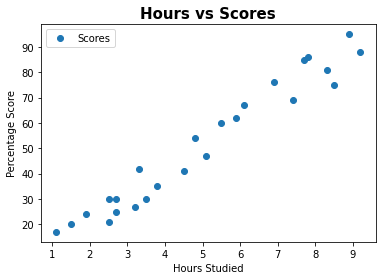

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Scores", fontsize=15, fontweight="bold")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From above graph we can see that there is correlation. For confirmation we plot regression graph.

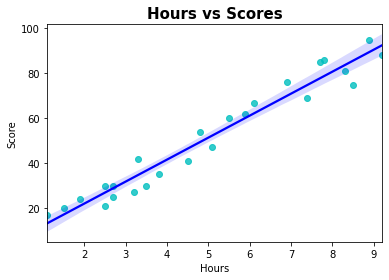

In [7]:
sns.regplot(x=data["Hours"], y=data["Scores"], data=data, scatter_kws={'color': "c"}, line_kws={'color': "b"})
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours vs Scores", fontsize=15, fontweight="bold")
plt.show()

We conclude that variables are correlated. Now we train our model. For that first we split our data

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Then fit data to our model.

In [9]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("Training complete.")

line = regression.coef_ * X + regression.intercept_



Training complete.


Here we predict from our model and comparing actual data and predicted data.

In [10]:
y_pred = regression.predict(X_test)  # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20  16.844722
1      27  33.745575
2      69  75.500624
3      30  26.786400
4      62  60.588106
5      35  39.710582
6      24  20.821393


Evalauting Mean Absolute Erroe

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


Now from the given quetion we predict the score of a student who studies for 9.25 hours using our model.

In [12]:
hours = [9.25]
own_pred = regression.predict([hours])
print("No of Hours = {}".format([hours]))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


Hence we get result using our model. Thus concluding this task.